In [8]:
#initialize any dependancies
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#initialize the dataset
mnist_data = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#split the data into training and test sets
(train_data,train_labels),(test_data,test_labels) = mnist_data

**Data Augmentation and Image processing**


---
Normalize the data set by dividing everything by 255


In [6]:
train_data = (train_data/255.).astype("float32")

In [7]:
test_data = (test_data/255.).astype("float32")

In [9]:
#now that we have preprocessed the datasets, its time to visualize some random examples
def view_random_image(train_data):
  """
  Takes a random image from the training set and displays it

  """
  random_integer = random.randint(0,len(train_data))
  plt.imshow(train_data[random_integer])

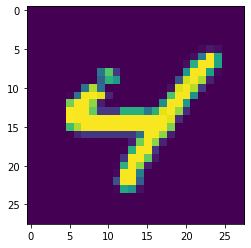

In [15]:
view_random_image(train_data)

In [18]:
#lets determine the amount of classes in our labels
print(np.unique(test_labels))
print(len(np.unique(test_labels)))

[0 1 2 3 4 5 6 7 8 9]
10


**Create Data Pipelines**

Creating a data pipeline in tf.data will allow our model to train faster.




In [19]:
#it looks like we should also shuffle the datasets....
train_dataset = tf.data.Dataset.from_tensor_slices(train_data,train_labels).shuffle(BUFFER_SIZE=1000).batch(32).prefetch(BUFFER_SIZE=1000)
test_dataset = tf.data.Dataset.from_tensor_slices(test_data,test_labels).shuffle(BUFFER_SIZE=1000).batch(32).prefetch(BUFFER_SIZE=1000)

ValueError: ignored

In [20]:
train_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [31]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
train_labels_with_2_dims = tf.expand_dims(train_labels,axis=1)
train_labels_with_3_dims = tf.expand_dims(train_labels_with_2_dims,axis=2)

In [39]:
#in order to make the values valid, we need the input shape of the images to be (something,28,28,1) - with the 1 being the color channels, which is 1 as the mnist images are black and white
train_dataset = tf.data.Dataset.from_tensor_slices(tf.expand_dims(train_data,axis=-1))

In [40]:
train_dataset_labels = tf.data.Dataset.from_tensor_slices(train_labels)

In [41]:
train_dataset_with_labels = tf.data.Dataset.zip((train_dataset,train_dataset_labels))

In [44]:
train_dataset_with_labels = train_dataset_with_labels.shuffle(buffer_size=1000).prefetch(buffer_size=1000)

In [45]:
test_dataset = tf.data.Dataset.from_tensor_slices(tf.expand_dims(test_data,axis=-1))
test_dataset_labels = tf.data.Dataset.from_tensor_slices(test_labels)
test_dataset_with_labels = tf.data.Dataset.zip((test_dataset,test_dataset_labels))

In [46]:
test_dataset_with_labels = test_dataset_with_labels.shuffle(buffer_size=1000).prefetch(buffer_size=1000)

In [43]:
list(train_dataset_with_labels.take(1))

[(<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
  array([[[0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ]],
  
         [[0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
     

**Creating the neural network**

Its time to create LeNet5

In [56]:
LeNet5 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(6,kernel_size=(5,5),strides=1),
                              tf.keras.layers.AveragePooling2D(),
                              tf.keras.layers.Conv2D(16,kernel_size=(5,5),strides=1),
                              tf.keras.layers.AveragePooling2D(),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(120),
                              tf.keras.layers.Dense(84),
                              tf.keras.layers.Dense(10,activation="softmax")
])

In [57]:
LeNet5.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [58]:
LeNet5.fit(train_dataset_with_labels.batch(128),epochs=15,validation_data=test_dataset_with_labels.batch(128))

Epoch 1/15
469/469 [==============================] - 23s 47ms/step - loss: 0.4492 - accuracy: 0.8694 - val_loss: 0.3519 - val_accuracy: 0.8984
Epoch 2/15
469/469 [==============================] - 22s 47ms/step - loss: 0.3443 - accuracy: 0.9003 - val_loss: 0.3294 - val_accuracy: 0.9073
Epoch 3/15
469/469 [==============================] - 22s 46ms/step - loss: 0.3321 - accuracy: 0.9038 - val_loss: 0.3220 - val_accuracy: 0.9105
Epoch 4/15
469/469 [==============================] - 22s 47ms/step - loss: 0.3274 - accuracy: 0.9055 - val_loss: 0.3203 - val_accuracy: 0.9080
Epoch 5/15
469/469 [==============================] - 22s 46ms/step - loss: 0.3244 - accuracy: 0.9075 - val_loss: 0.3148 - val_accuracy: 0.9118
Epoch 6/15
469/469 [==============================] - 22s 47ms/step - loss: 0.3178 - accuracy: 0.9092 - val_loss: 0.3055 - val_accuracy: 0.9134
Epoch 7/15
469/469 [==============================] - 22s 47ms/step - loss: 0.3156 - accuracy: 0.9106 - val_loss: 0.3119 - val_accuracy:

In [59]:
LeNet5.save("LeNet5.h5")